#Chopsticks!
Craig Nicholson  
August 29, 2015

A few researchers set out to determine the optimal length of chopsticks for children and adults. They came up with a measure of how effective a pair of chopsticks performed, called the "Food Pinching Performance." The "Food Pinching Performance" was determined by counting the number of peanuts picked and placed in a cup (PPPC).

### An investigation for determining the optimum length of chopsticks.
[Link to Abstract and Paper](http://www.ncbi.nlm.nih.gov/pubmed/15676839)  
*the abstract below was adapted from the link*

Chopsticks are one of the most simple and popular hand tools ever invented by humans, but have not previously been investigated by [ergonomists](https://www.google.com/search?q=ergonomists). Two laboratory studies were conducted in this research, using a [randomised complete block design](http://dawg.utk.edu/glossary/whatis_rcbd.htm), to evaluate the effects of the **length of the chopsticks on the food-serving performance** of adults and children. Thirty-one male junior college students and 21 primary school pupils served as subjects for the experiment to test chopsticks lengths of 180, 210, 240, 270, 300, and 330 mm. The results showed that the **food-pinching performance was significantly affected by the length of the chopsticks**, and that chopsticks of about 240 and 180 mm long were optimal for adults and pupils, respectively. Based on these findings, the researchers suggested that families with children should provide both 240 and 180 mm long chopsticks. In addition, restaurants could provide 210 mm long chopsticks, considering the trade-offs between ergonomics and cost.


In [8]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from scipy.stats import ttest_ind

# pandas is a software library for data manipulation and analysis
# We commonly use shorter nicknames for certain packages. Pandas is often abbreviated to pd.
# hit shift + enter to run this cell or block of code
path = '~/Downloads/chopstick-effectiveness.csv'
dataFrame = pd.read_csv(path)

#### 1. What is the independent variable in the experiment?
The independent variable is the length of chopsticks


#### 2. What is the dependent variable in the experiment?

food-pinching performance (PPPC)

{The dependent variable is what is being measured, the PPPC performance, which is affected by the independent variable}

#### 3. How is the dependent variable operationally defined?
The "Food Pinching Performance" was determined by counting the number of peanuts picked and placed in a cup (PPPC).


#### 4. Based on the description of the experiment and the data set, list at least two variables that you know were controlled.
Think about the participants who generated the data and what they have in common. You don't need to guess any variables or read the full paper to determine these variables. (For example, it seems plausible that the material of the chopsticks was held constant, but this is not stated in the abstract or data description.)

- height of the cup
- diameter of the opening of the cup
- the size and type of the peanuts
- room temperature
- the time or length of time the participant was allowed to pick up peanuts and place into a cup
- the number of attempts to pick up each peanut
- whether the group was all male, female or a mix or individuals
- ambient temperature in the testing facility
- ambient light in the testing facility


Let's do a basic statistical calculation on the data using code! Run the block of code below to calculate the average "Food Pinching Efficiency" for all 31 participants and all chopstick lengths.

In [9]:
dataFrame['Food.Pinching.Efficiency'].mean()

25.00559139784947

This number is helpful, but the number doesn't let us know which of the chopstick lengths performed best for the thirty-one male junior college students. Let's break down the data by chopstick length. The next block of code will generate the average "Food Pinching Effeciency" for each chopstick length. Run the block of code below.

In [10]:
meansByChopstickLength = dataFrame.groupby('Chopstick.Length')['Food.Pinching.Efficiency'].mean().reset_index()
meansByChopstickLength

# reset_index() changes Chopstick.Length from an index to column. Instead of the index being the length of the chopsticks, the index is the row numbers 0, 1, 2, 3, 4, 5.

,Chopstick.Length,Food.Pinching.Efficiency
0,180,24.935161
1,210,25.483871
2,240,26.322903
3,270,24.323871
4,300,24.968065
5,330,23.999677


Find the median

In [11]:
medianByChopstickLength = dataFrame.groupby('Chopstick.Length')['Food.Pinching.Efficiency'].median().reset_index()
medianByChopstickLength

,Chopstick.Length,Food.Pinching.Efficiency
0,180,26.35
1,210,25.42
2,240,26.43
3,270,24.50
4,300,25.09
5,330,23.63


#### 5. Which chopstick length performed the best for the group of thirty-one male junior college students?



The chopstick length of 240mm performed the best for the group of 31 male junior college students.  With a mean Efficiency in PPPC of 26.32.

The scatter plots below all show the chopstick length of 240mm has the best PPPC.

Populating the interactive namespace from numpy and matplotlib


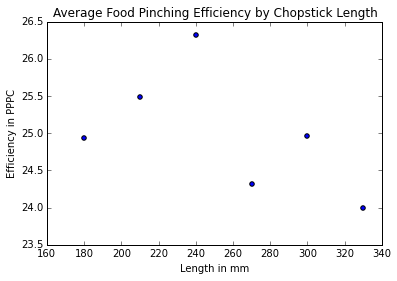

In [45]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

import matplotlib.pyplot as plt

plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'])
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average Food Pinching Efficiency by Chopstick Length")
plt.show()

y = -0.00783225806452x + 27.0028172043


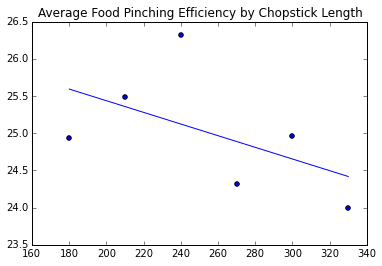

In [71]:
# Overlay the best fit line for the meansByChopstickLength
# Use slope intercept form y = mx + b
# m is the slope
# b is the y intercept where x = 0
m, b = np.polyfit(meansByChopstickLength['Chopstick.Length'], meansByChopstickLength['Food.Pinching.Efficiency'], 1)
plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'])
plt.plot(meansByChopstickLength['Chopstick.Length'], m*meansByChopstickLength['Chopstick.Length'] + b, '-')
plt.title("Average Food Pinching Efficiency by Chopstick Length")

print 'y = ' + str(m) + 'x + ' + str(b)


The plot above also has the best fit line plotted assuming the realtionship for Chopstick length and PPPC is a linear relationship.

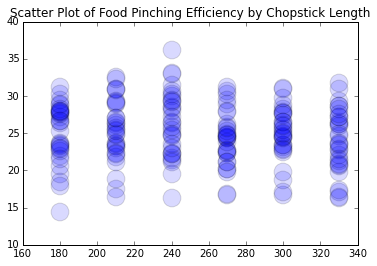

In [15]:
# Scatterplot of all the values to see the spread of the data
# define area for the circle/point, to make the points 'jitter'
area = np.pi * 100

plt.scatter(x=dataFrame['Chopstick.Length'],y=dataFrame['Food.Pinching.Efficiency'], s=area, alpha=0.15)
plt.title("Scatter Plot of Food Pinching Efficiency by Chopstick Length")
plt.show()

y = -0.00783225806452x + 27.0028172043


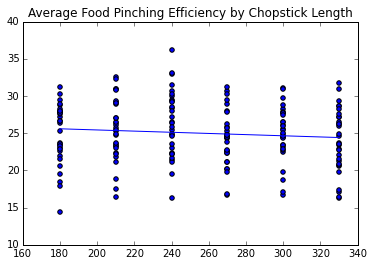

In [16]:
# Overlay the best fit line for the meansByChopstickLength
# Use slope intercept form y = mx + b
# m is the slope
# b is the y intercept where x = 0
m, b = np.polyfit(dataFrame['Chopstick.Length'], dataFrame['Food.Pinching.Efficiency'], 1)
plt.scatter(x=dataFrame['Chopstick.Length'], y=dataFrame['Food.Pinching.Efficiency'])
plt.plot(dataFrame['Chopstick.Length'], m*dataFrame['Chopstick.Length'] + b, '-')
plt.title("Average Food Pinching Efficiency by Chopstick Length")

print 'y = ' + str(m) + 'x + ' + str(b)

Since we only have a limited number of data points in the plot above for the meanChopstickLengths I wanted to plot the trendline for the entire sample and see if the linear equation remains the the same or approximate.

y = -0.00783225806452x + 27.0028172043  (means of the sample)  
y = -0.00783225806452x + 27.0028172043  (sample population)

The linear equations are equal.

## Plot of mean and median since outliers can affect the mean.

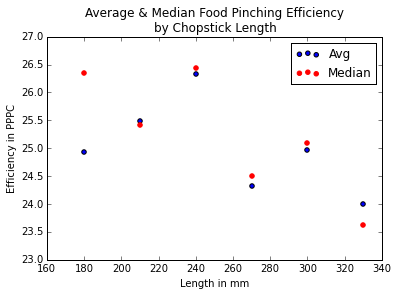

In [29]:
plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'], label='Avg')
plt.scatter(x=medianByChopstickLength['Chopstick.Length'], y=medianByChopstickLength['Food.Pinching.Efficiency'], label='Median', color='red')
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length")
plt.legend()
plt.show()

The chopstick length median and mean of 180mm have a much larger difference between the two values than all the other chopstick lengths.   

Let's review these 31 samples and plot a histogram for the chopstick length of 180mm.

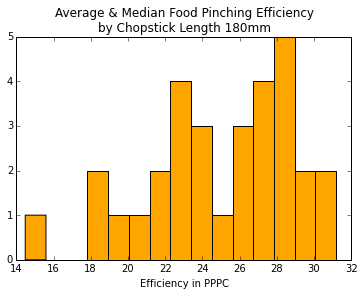

In [67]:
cs180 = dataFrame[dataFrame['Chopstick.Length']== 180]
cs180 = cs180.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

#Plot the data so we can easily find the outlier
plt.hist(x=cs180['Food.Pinching.Efficiency'], bins=15,color='orange')
plt.xlabel("Efficiency in PPPC")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length 180mm")
plt.show()


We can see that the histogram is negatively skewed.  Is this because each subject performing the test first used 180mm chopsticks and got better with each placement of a peanut in the cup?  

My PPPC performance with chopsticks and sushi improves with each peice of sushi I pick up.

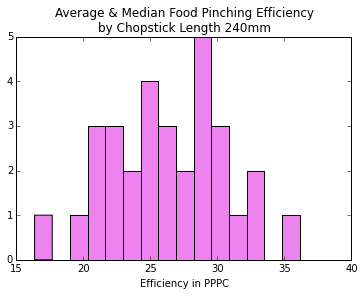

In [70]:
cs240 = dataFrame[dataFrame['Chopstick.Length']== 240]
cs240 = cs240.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

#Plot the data so we can easily find the outlier
plt.figure()
plt.hist(x=cs240['Food.Pinching.Efficiency'], bins=15, color='violet')
plt.xlabel("Efficiency in PPPC")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length 240mm")
plt.show()

The histogram of the 240mm chopstick is more likely normal than than the 180mm chopstick PPPC frequency.

#### 6. Based on the scatterplot created from the code above, interpret the relationship you see. What do you notice?
Pinching Efficiency increases from a length of 160 mm to 240mm and then pinching efficiency begins to decrease once the choopsticks are longer than 240 mm.


### In the abstract the researchers stated that their results showed food-pinching performance was significantly affected by the length of the chopsticks, and that chopsticks of about 240 mm long were optimal for adults.

#### 7a. Based on the data you have analyzed, do you agree with the claim?
Yes

#### 7b. Why?
The mean Efficiency in PPPC was highest (26.32) at a chopstick length of 240mm.  Once chopsticks were longer than 240mm the mean Efficiency in PPPC decreased. And chopsticks smaller than 240mm have a lower mean Efficiency in PPPC as well.

Using Pearson Correlation we can see a correlation exists between the two variables.  A negative correlation

We an also check to see if the means of the Food.Pinching.Efficiency per Chopstick.Length are statistically different. We would like to see if there is a difference in the PPPC and the length fo the chopsticks.

In [33]:
meansByChopstickLength['Food.Pinching.Efficiency'].corr(meansByChopstickLength['Chopstick.Length'], method='pearson')

-0.52942488271983223

TODO (Compare all chopstick sizes together at once and review the -pvalues.)  
TODO (Running a t-test we are saying Chopstick length has no effect **or** Chopstick length has an effect on PPPC.)

In [37]:
# Get the data for a particular chopstick length
cs1 = dataFrame[dataFrame['Chopstick.Length']== 240]
cs2 = dataFrame[dataFrame['Chopstick.Length']==330]
ttest_ind(cs1['Food.Pinching.Efficiency'], cs2['Food.Pinching.Efficiency'])
# output: t-statistic, p-value (2 tailed)

(2.1122838887226356, 0.038833353209955769)

## Sample Size Validation
Validating we have similar sized samples for each Chopstick.Length.  The box plot shows us the Chopstick lengths and their ranges, quartiles, and means in one plot easy to review.  Using this plot we can see that a chopstick length of 240mm also had the largest range of food piniching efficiency.

In [37]:
counts = dataFrame.groupby('Chopstick.Length').count()
counts

,Food.Pinching.Efficiency,Individual
Chopstick.Length,,
180,31,31
210,31,31
240,31,31
270,31,31
300,31,31
330,31,31


## Boxplot and Histogram for the PPPC
Plot a boxplot and histogram of PPPC for the entire sample and check if the distrubution is likely normal.

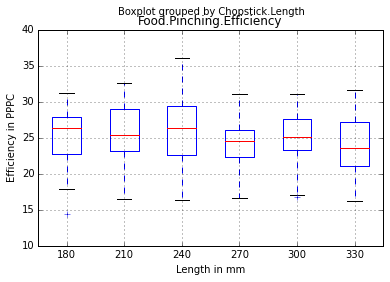

In [26]:
#Slice the data for a nice box plot
x_sec = dataFrame[['Chopstick.Length', 'Food.Pinching.Efficiency']]
plt.figure()
bp = x_sec.boxplot(by='Chopstick.Length')
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")

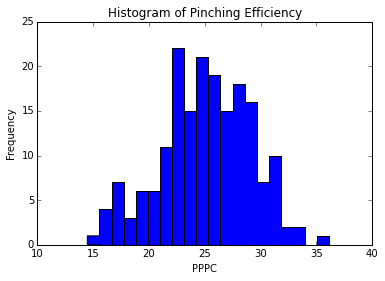

In [28]:
# plot a histogram with 10 bins  - bin size ~ 1.46
plt.hist(dataFrame['Food.Pinching.Efficiency'], bins=20)
plt.title("Histogram of Pinching Efficiency")
plt.xlabel("PPPC")
plt.ylabel("Frequency")

In [48]:
dataFrame['Food.Pinching.Efficiency'].describe()

count    186.000000
mean      25.005591
std        4.039693
min       14.470000
25%       22.540000
50%       24.905000
75%       27.932500
max       36.150000
Name: Food.Pinching.Efficiency, dtype: float64

The data is likely normally distributed in the histogram.